In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
bus = pd.read_csv('../data/complete_scheduled_trips')

In [3]:
bus.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date,weekday,day_name
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,6.500000,345104120230801,1,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,9,0.000000,345104120230801,1,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,19,0.000000,345104120230801,1,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,NaN,0,35,0.000000,345104120230801,1,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,1,0,0.0,0,36,12.866666,345105120230801,1,Tuesday


In [15]:
# split scheduled time column to get hour for time of day calculation
bus[['sched_hour', 'sched_min', 'sched_sec']] = bus['SCHEDULED_TIME'].str.split(':', expand = True)

In [17]:
bus['sched_hour'].value_counts().sort_index()

04                1714
05               10391
06               19811
07               22567
08               21142
09               20682
10               20392
11               20327
12               20609
13               20494
14               21090
15               22758
16               22548
17               21651
18               17924
19               13973
1900-01-01 00     4195
1900-01-01 01      122
20               12715
21               12265
22               11598
23                9445
Name: sched_hour, dtype: int64

In [19]:
bus.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date,weekday,day_name,sched_hour,sched_min,sched_sec
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,2,6.500000,345104120230801,1,Tuesday,04,42,00
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,9,0.000000,345104120230801,1,Tuesday,04,46,00
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,19,0.000000,345104120230801,1,Tuesday,04,54,00
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,35,0.000000,345104120230801,1,Tuesday,05,10,00
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0.0,0,36,12.866666,345105120230801,1,Tuesday,05,15,00


In [21]:
# add time of day column
def map_sched_time(hour):
    if hour in ['04', '05', '06']:
        return 'Early Morning'
    elif hour in ['07', '08', '09']:
        return 'Morning Rush'
    elif hour in ['10', '11', '12']:
        return 'Late Morning'
    elif hour in ['13', '14', '15', '16']:
        return 'Afternoon'
    elif hour in ['17', '18']:
        return 'Evening Rush'
    elif hour in ['19', '20', '21', '22']:
        return 'Evening'
    else:
        return 'Late Night'

bus['time_of_day'] = bus['sched_hour'].apply(lambda hour: map_sched_time(hour))

In [22]:
bus.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date,weekday,day_name,sched_hour,sched_min,sched_sec,time_of_day
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,2,6.500000,345104120230801,1,Tuesday,04,42,00,Early Morning
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,9,0.000000,345104120230801,1,Tuesday,04,46,00,Early Morning
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,19,0.000000,345104120230801,1,Tuesday,04,54,00,Early Morning
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,35,0.000000,345104120230801,1,Tuesday,05,10,00,Early Morning
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,36,12.866666,345105120230801,1,Tuesday,05,15,00,Early Morning


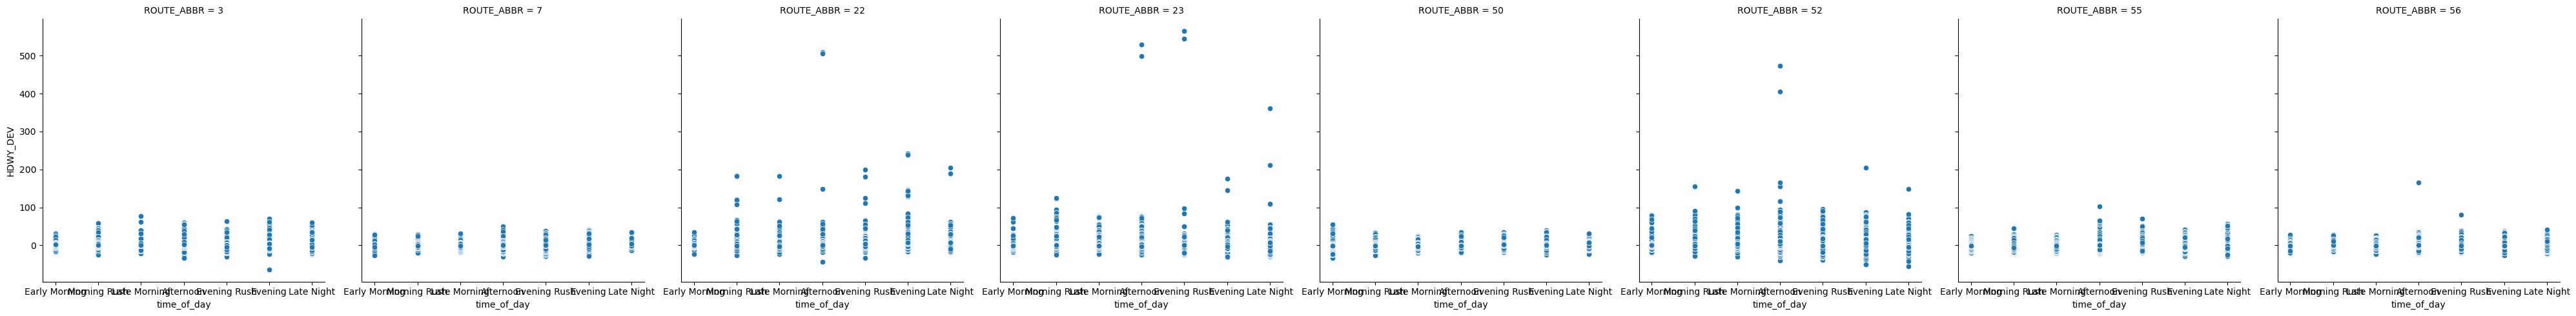

In [24]:
sns.relplot(data = bus, x = 'time_of_day', y = 'HDWY_DEV', kind = 'scatter', col = 'ROUTE_ABBR')

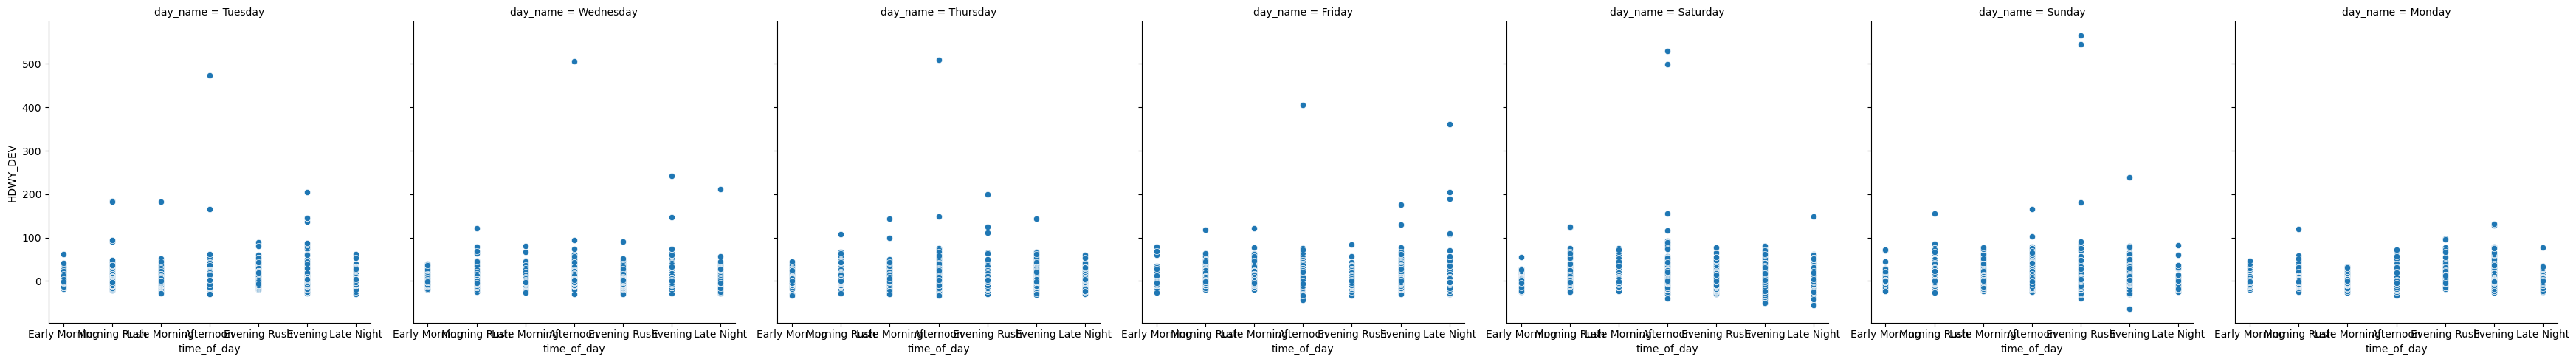

In [25]:
sns.relplot(data = bus, x = 'time_of_day', y = 'HDWY_DEV', kind = 'scatter', col = 'day_name')